In [37]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pk = pd.read_csv("parkinsons.data")

pk.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


In [4]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
pk.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
null_columns=pk.columns[pk.isnull().any()]
pk[null_columns].isnull().sum()

print("There are no null coloumns in in the data")

There are no null coloumns in in the data


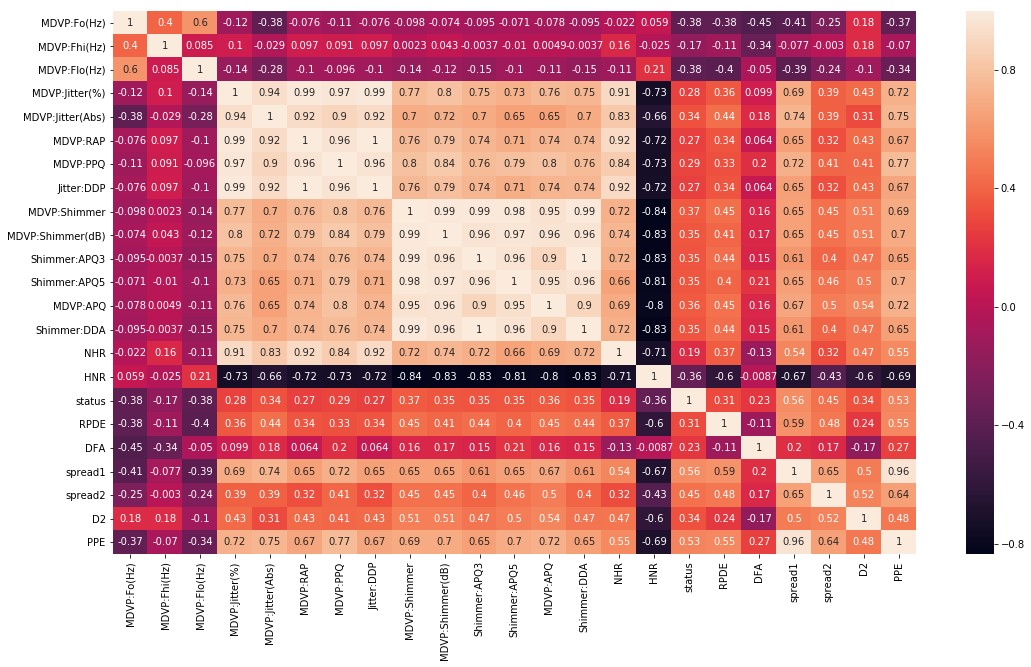

In [7]:
plt.figure(figsize=(18,10))
sns.heatmap(pk.corr(), annot=True)
plt.show()


In [8]:
# Univariate analysis

#Columns Chosed for analysis
# MDVP:Fo(Hz)
# MDVP:Fhi(Hz)
# MDVP:Flo(Hz)
# MDVP:Jitter(Abs)
# MDVP:Shimmer
# Status
# RPDE
# DFA
# spread1
# spread2
# D2
# PPE
print("For the purpose of Univariate and bivariate  we are choosing the above mentioned columns only on high level. Because based on the heat map some of the variabes are strongly corealted with each other. This makes choosing/omitting the variables will have same effect on the outcome")

For the purpose of Univariate and bivariate  we are choosing the above mentioned columns only on high level. Because based on the heat map some of the variabes are strongly corealted with each other. This makes choosing/omitting the variables will have same effect on the outcome


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


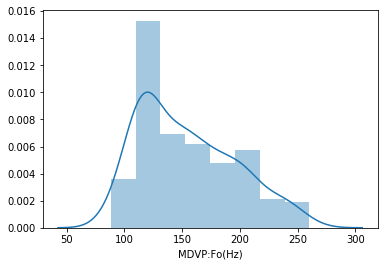

This is a right skewed data distribution. Majority of the data are distributed between 115 to 215 Hz


In [9]:
sns.distplot(pk["MDVP:Fo(Hz)"])
plt.show()

print("This is a right skewed data distribution. Majority of the data are distributed between 115 to 215 Hz")

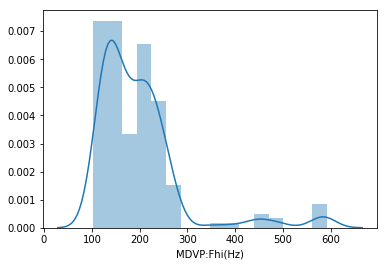

Right skewed with data with outliers


In [10]:
sns.distplot(pk["MDVP:Fhi(Hz)"])
plt.show()

print("Right skewed with data with outliers")

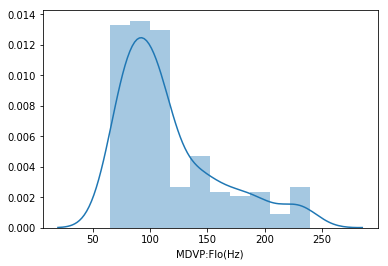

Right skewed with data with majority of data distributed between 70 to 140hz 


In [11]:
sns.distplot(pk["MDVP:Flo(Hz)"])
plt.show()

print("Right skewed with data with majority of data distributed between 70 to 140hz ")

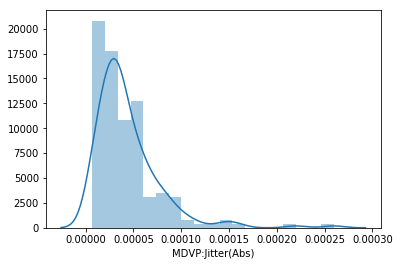

Right skewed with majority of data distributed between .00001 to .00006 %


In [12]:
sns.distplot(pk["MDVP:Jitter(Abs)"])
plt.show()

print("Right skewed with majority of data distributed between .00001 to .00006 %")

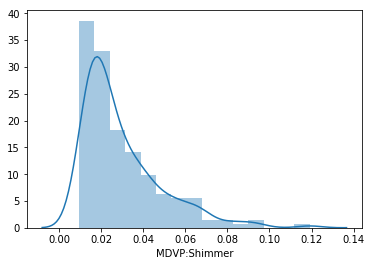

Right skwed distribution with majority of the data  distributed between .016 t0 0.038


In [13]:
sns.distplot(pk["MDVP:Shimmer"])
plt.show()

print("Right skwed distribution with majority of the data  distributed between .016 t0 0.038")


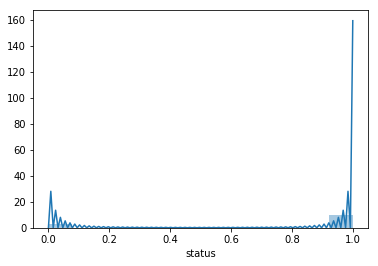

Majority of the cases are positive and lies between 25% to 75%


In [14]:
sns.distplot(pk["status"])
plt.show()

print("Majority of the cases are positive and lies between 25% to 75%")

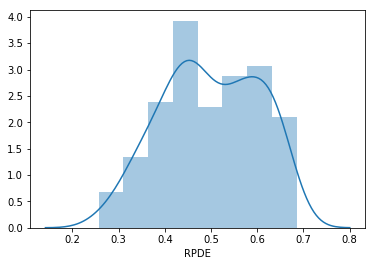

Left skwed with majority of data distributed between 3.6 to 6.9


In [15]:
sns.distplot(pk["RPDE"])
plt.show()

print("Left skwed with majority of data distributed between 3.6 to 6.9")


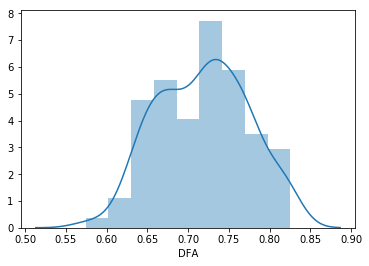

Uniform distibution of data with majority of the data distributed between .64 to .79


In [16]:
sns.distplot(pk["DFA"])
plt.show()
print("Uniform distibution of data with majority of the data distributed between .64 to .79")

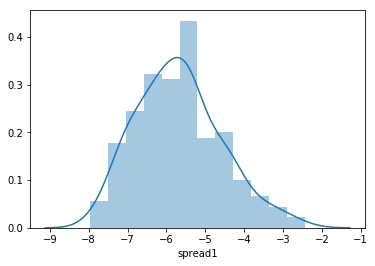

Uniform data distribution with majority of data between -.7 to -5.5


In [17]:
sns.distplot(pk["spread1"])
plt.show()

print("Uniform data distribution with majority of data between -.7 to -5.5")

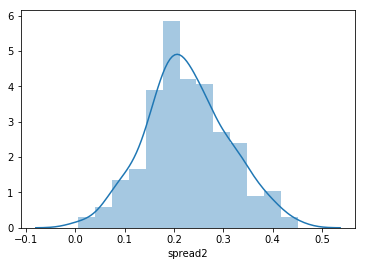

Data is uniformly distributed


In [18]:
sns.distplot(pk["spread2"])
plt.show()

print("Data is uniformly distributed")


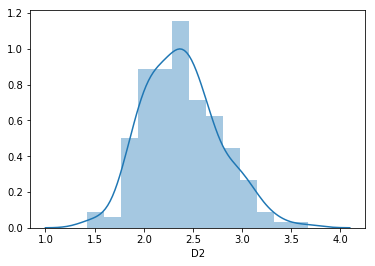

Data is uniformly distributed


In [19]:
sns.distplot(pk["D2"])
plt.show()

print("Data is uniformly distributed")

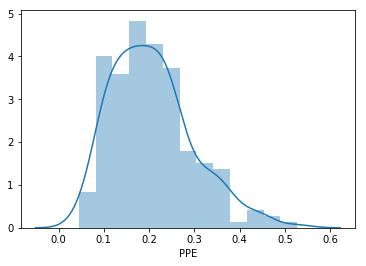

Uniform data distribution


In [20]:
sns.distplot(pk["PPE"])
plt.show()
print("Uniform data distribution")

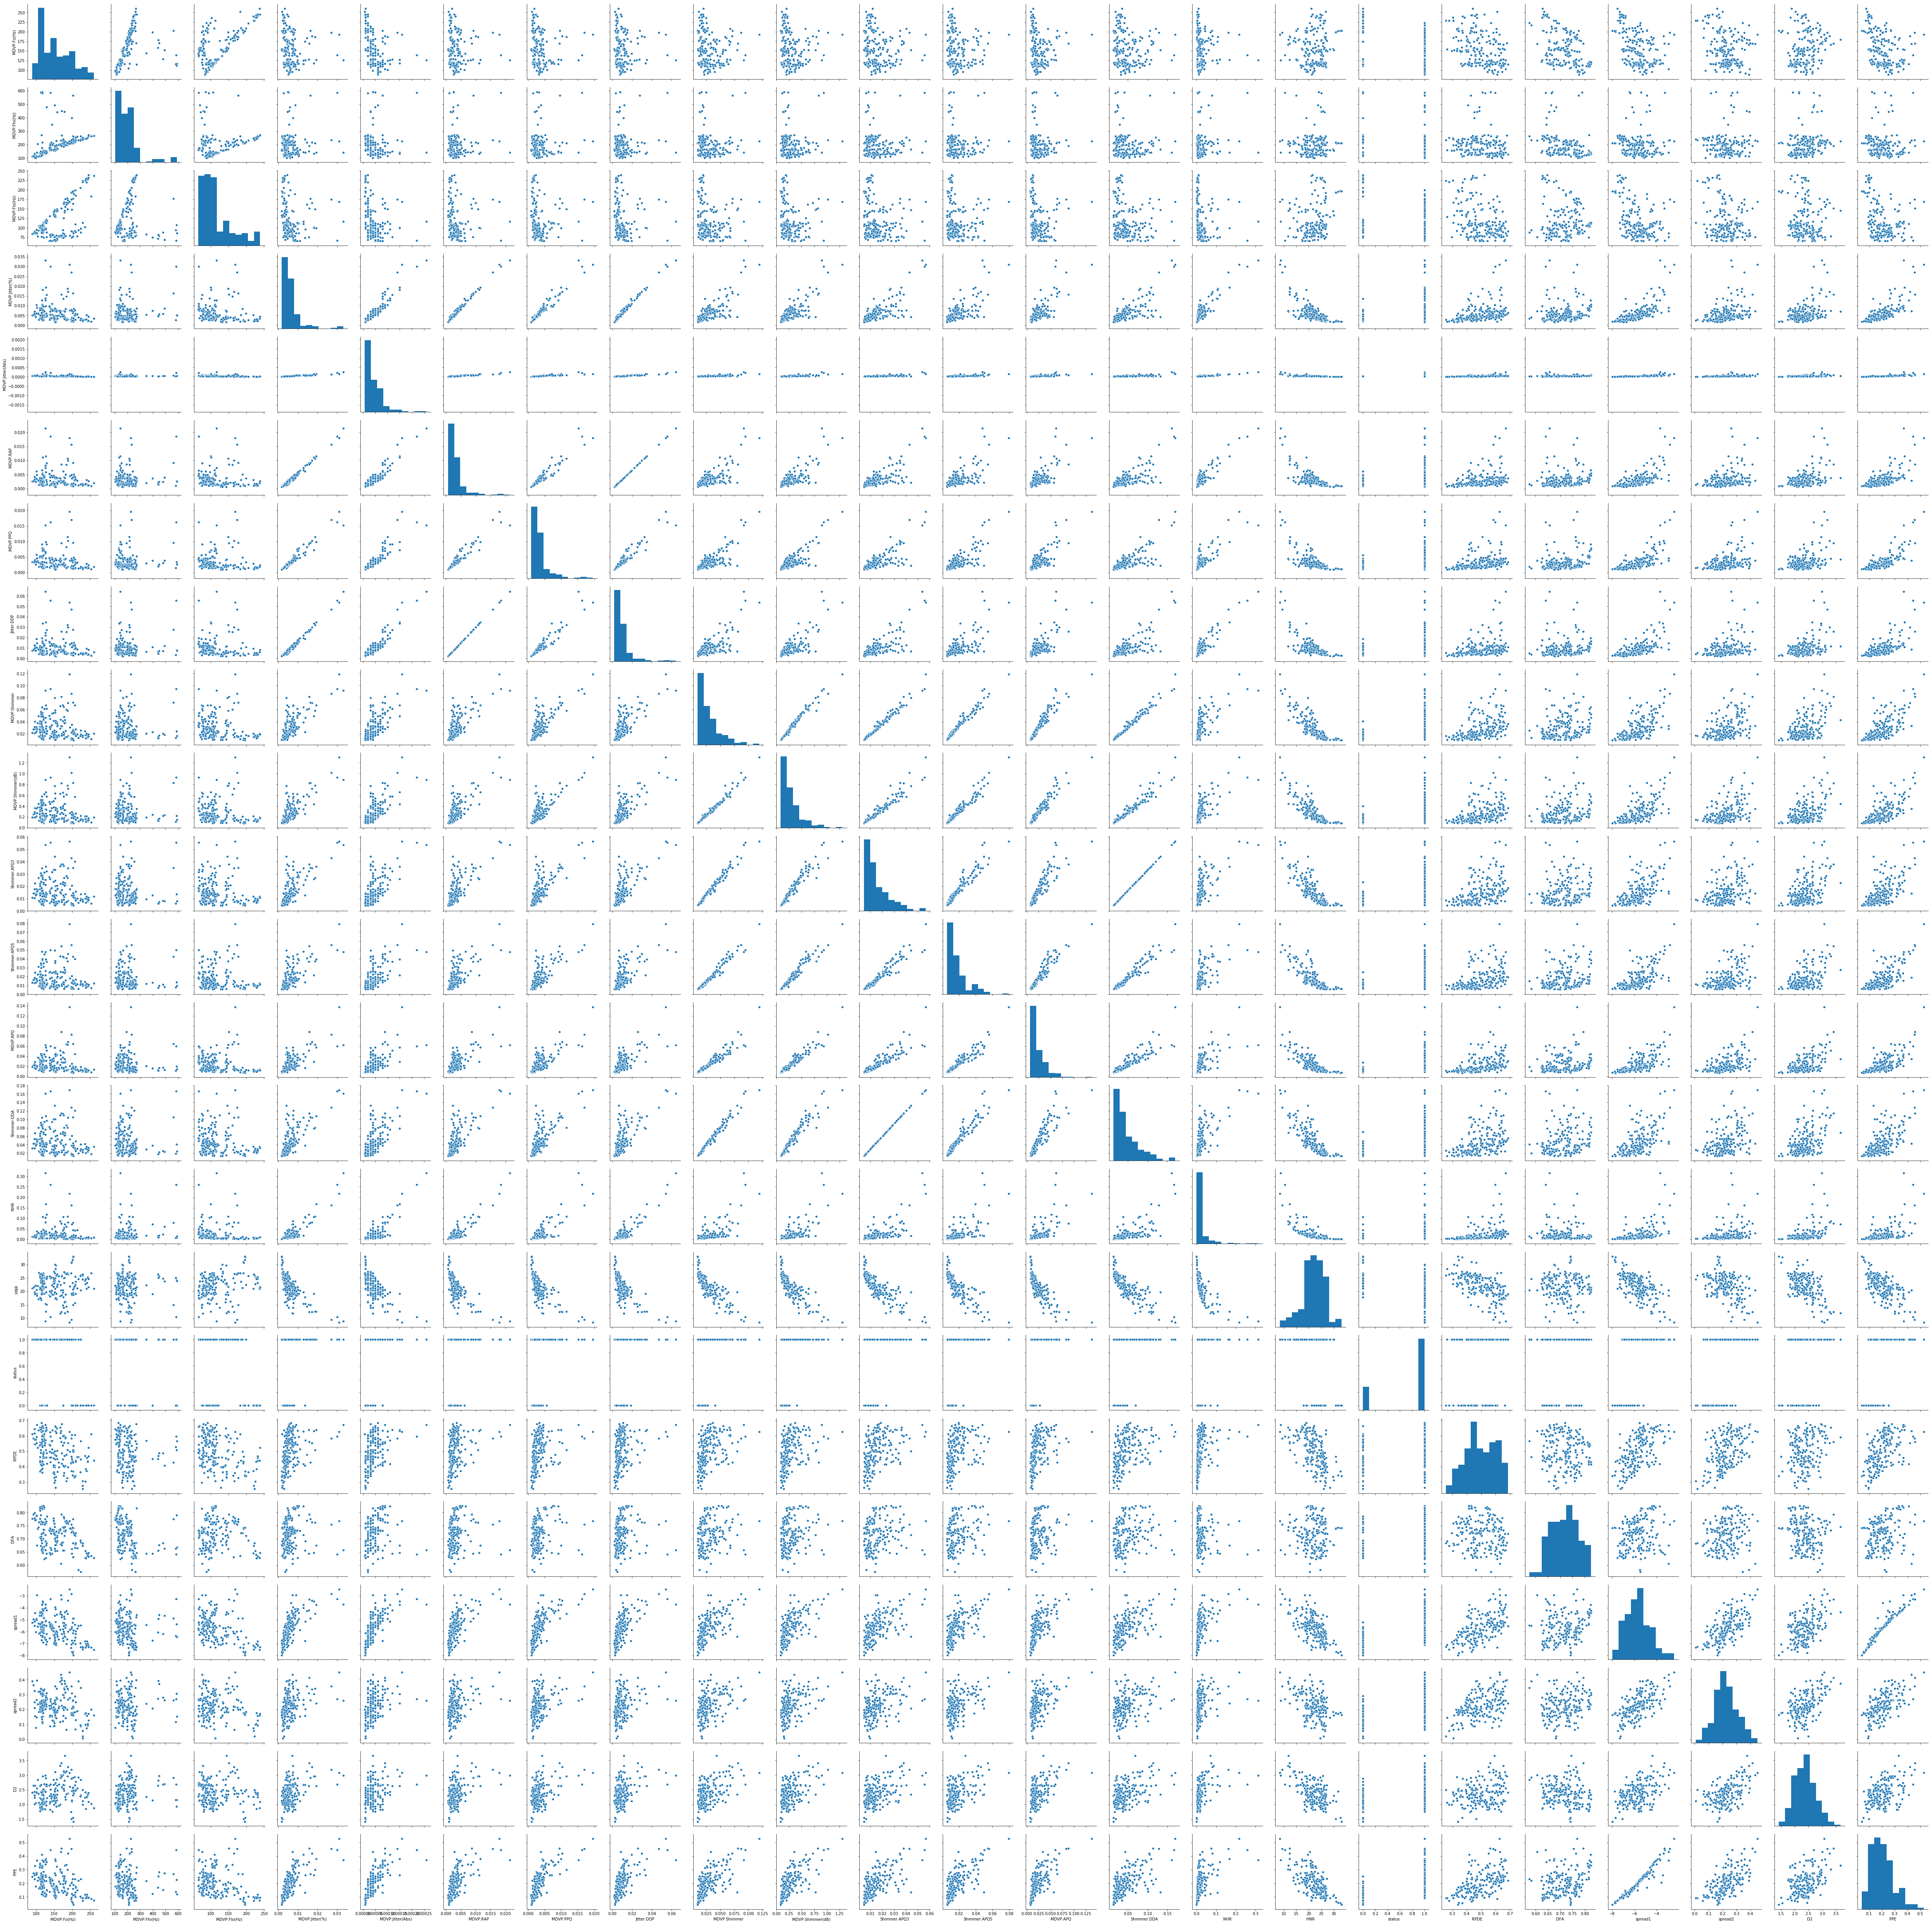

In [21]:
#Multivariate Analyysis
sns.pairplot(pk,height=3)

In [22]:
pk.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [42]:
pk.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [48]:
# 4 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
# pk.shape
X = pk.drop(["status","name"], axis=1)
y = pk["status"]
# X.shape
# y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state = 7)
# X_train.shape
# X_test.shape


In [68]:
#5 Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
Dt_model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0 )
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=4,random_state=0 )


Rf_model.fit(X_train, y_train)
yrf_predict = Rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test,yrf_predict)
print("Random Forest Accuracy : " + str(rf_accuracy))
pd.crosstab(y_test,yrf_predict, rownames=['Actual Result'], colnames=['Predicted Result'])

Random Forest Accuracy : 0.9333333333333333


Predicted Result,0,1
Actual Result,,
0,4,2
1,0,24


In [69]:
Dt_model.fit(X_train, y_train)
ydt_predict = Dt_model.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test,ydt_predict)
print("Accuract of DecisionTree model Dt_model :" + str(dt_accuracy))
pd.crosstab(y_test,ydt_predict, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuract of DecisionTree model Dt_model :0.8333333333333334


Predicted Result,0,1
Actual Result,,
0,5,1
1,4,20


In [73]:
Dt_model2.fit(X_train, y_train)
ydt2_predict = Dt_model2.predict(X_test)
dt2_accuracy =metrics.accuracy_score(y_test,ydt2_predict)
print("Accuract of DecisionTree model Dt_model2 :" + str(dt2_accuracy))
pd.crosstab(y_test,ydt2_predict, rownames=['Actual Result'], colnames=['Predicted Result'])

Accuract of DecisionTree model Dt_model2 :0.7333333333333333


Predicted Result,0,1
Actual Result,,
0,6,0
1,8,16


In [64]:
models = []
models.append(('DecisionTree', Dt_model))
models.append(('DT_Regularized',Dt_model2))
models.append(('RandomForest', Rf_model))


DecisionTree: 0.764103 (0.106834)
DT_Regularized: 0.764103 (0.134120)
RandomForest: 0.789744 (0.169619)


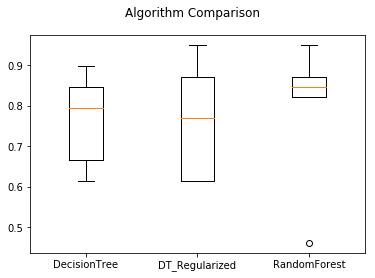

In [74]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [118]:
# Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=4,min_samples_leaf=1,random_state=0 )
# Rf_model.fit(X_train, y_train)
# yrf_predict = Rf_model.predict(X_test)
# rf_accuracy = metrics.accuracy_score(y_test,yrf_predict)

# print(rf_accuracy)
    

In [107]:
# Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
# Dt_model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=0 )
min_leaf_size = range(1,20)
for leaf_size in min_leaf_size:
    Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=4,min_samples_leaf=leaf_size,random_state=0 )
    Rf_model.fit(X_train, y_train)
    yrf_predict = Rf_model.predict(X_test)
    rf_accuracy = metrics.accuracy_score(y_test,yrf_predict)
    print("Random Forest Accuracy with min_leaft_size =>" + str(leaf_size) + " =>" + str(rf_accuracy))
    

Random Forest Accuracy with min_leaft_size =>1 =>0.9333333333333333
Random Forest Accuracy with min_leaft_size =>2 =>0.9333333333333333
Random Forest Accuracy with min_leaft_size =>3 =>0.9
Random Forest Accuracy with min_leaft_size =>4 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>5 =>0.9
Random Forest Accuracy with min_leaft_size =>6 =>0.9
Random Forest Accuracy with min_leaft_size =>7 =>0.9
Random Forest Accuracy with min_leaft_size =>8 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>9 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>10 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>11 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>12 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>13 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>14 =>0.8666666666666667
Random Forest Accuracy with min_leaft_size =>15 =>0.8666666666666667
Random Forest Accuracy with min_le

In [114]:
max_depth = range(1,20)
for depth in max_depth:
    Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=depth,min_samples_leaf=1,random_state=0 )
    Rf_model.fit(X_train, y_train)
    yrf_predict = Rf_model.predict(X_test)
    rf_accuracy = metrics.accuracy_score(y_test,yrf_predict)
    print("Random Forest Accuracy with max_depth =>" + str(depth) + " =>" + str(rf_accuracy))

Random Forest Accuracy with max_depth =>1 =>0.8333333333333334
Random Forest Accuracy with max_depth =>2 =>0.8666666666666667
Random Forest Accuracy with max_depth =>3 =>0.8666666666666667
Random Forest Accuracy with max_depth =>4 =>0.9333333333333333
Random Forest Accuracy with max_depth =>5 =>0.9333333333333333
Random Forest Accuracy with max_depth =>6 =>0.9333333333333333
Random Forest Accuracy with max_depth =>7 =>0.9333333333333333
Random Forest Accuracy with max_depth =>8 =>0.9333333333333333
Random Forest Accuracy with max_depth =>9 =>0.9333333333333333
Random Forest Accuracy with max_depth =>10 =>0.9333333333333333
Random Forest Accuracy with max_depth =>11 =>0.9333333333333333
Random Forest Accuracy with max_depth =>12 =>0.9333333333333333
Random Forest Accuracy with max_depth =>13 =>0.9333333333333333
Random Forest Accuracy with max_depth =>14 =>0.9333333333333333
Random Forest Accuracy with max_depth =>15 =>0.9333333333333333
Random Forest Accuracy with max_depth =>16 =>0.93

In [119]:
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=4,min_samples_leaf=1,random_state=0 )
Rf_model.fit(X_train, y_train)
yrf_predict = Rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test,yrf_predict)
print("From the above data with min_sample_leaf 1 and max_depth value 4 we get he optimal accuracy for the given dataset")


From the above data with min_sample_leaf 1 and max_depth value 4 we get he optimal accuracy for the given dataset
